### Exercícios

Utilizando a plotagem com pandas, reproduzam as visualizações abaixo, tentando deixá-las o mais próximas quanto possível da maneira como estão postas. Para isso, atentem-se às personalizações dos gráficos, como títulos, legendas, eixos e outros tipos possíveis de formatações e preferências de visualizações dos dados. Também é interessante que vocês discutam possíveis pontos de melhorias dessas visualizações!

**Exercício 1.** Reproduza o gráfico de barras abaixo, em que cada barra representa um dos 10 países com mais casos confirmados de COVID no dataset, e a "quebra" em cada cor indica a predominância de casos confirmados em cada mês.

In [1]:
import pandas as pd

In [4]:
df_covid = pd.read_csv('Covid_19_Countrywise_timeseries.csv')
print(df_covid.shape)
print(df_covid.dtypes)
df_covid.head()

(4973, 12)
Unnamed: 0           int64
ObservationDate     object
country             object
Confirmed            int64
Deaths               int64
Recovered            int64
Code                object
latitude           float64
longitude          float64
New Confirmed        int64
New Recovered        int64
New Death            int64
dtype: object


,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


In [5]:
df_covid['month'] = pd.to_datetime(df_covid['ObservationDate']).dt.month
#df_covid['month'] = df_covid['date'].dt.month
df_covid

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death,month
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0,2
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0,3
2,869,02/24/2020,afghanistan,1,0,0,AF,33.939110,67.709953,1,0,0,2
3,909,02/25/2020,afghanistan,1,0,0,AF,33.939110,67.709953,0,0,0,2
4,955,02/26/2020,afghanistan,1,0,0,AF,33.939110,67.709953,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4134,03/24/2020,zimbabwe,3,1,0,ZW,-19.015438,29.154857,0,0,0,3
4969,4272,03/25/2020,zimbabwe,3,1,0,ZW,-19.015438,29.154857,0,0,0,3
4970,4482,03/26/2020,zimbabwe,3,1,0,ZW,-19.015438,29.154857,0,0,0,3
4971,4633,03/27/2020,zimbabwe,5,1,0,ZW,-19.015438,29.154857,2,0,0,3


In [6]:
mapping = {1:'2020-01', 2:'2020-02', 3:'2020-03'}
df_covid['reference_month'] = df_covid['month'].map(mapping)
df_covid.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death,month,reference_month
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0,2,2020-02
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0,3,2020-03
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0,2,2020-02
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2,2020-02
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2,2020-02


<Axes: ylabel='country'>

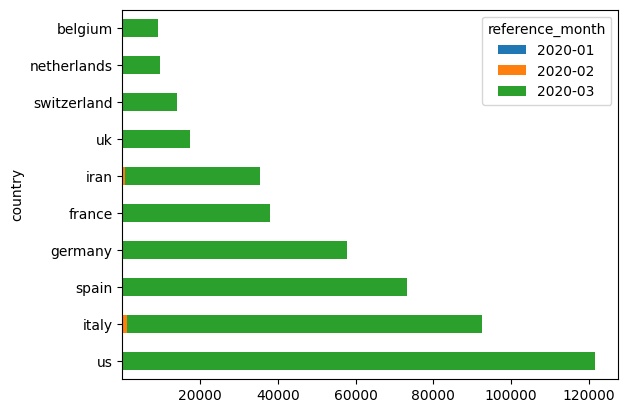

In [22]:
covid_grafico = df_covid.groupby(['country', 'reference_month'])['New Confirmed'].sum().unstack().fillna(0)
covid_grafico.sort_values(by=['2020-03'], ascending=False)[:10].plot(kind='barh', stacked=True)

**Exercício 2.** Reproduza o gráfico de linhas abaixo, que representa a série temporal da evolução de emissões de CO2 no Brasil.

In [23]:
df_co2 = pd.read_csv('co2_emissions_kt_by_country.csv')
print(df_co2.shape, df_co2.dtypes)
df_co2.head()

(13953, 4) country_code     object
country_name     object
year              int64
value           float64
dtype: object


,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [26]:
df_co2['country_name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding

<Axes: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

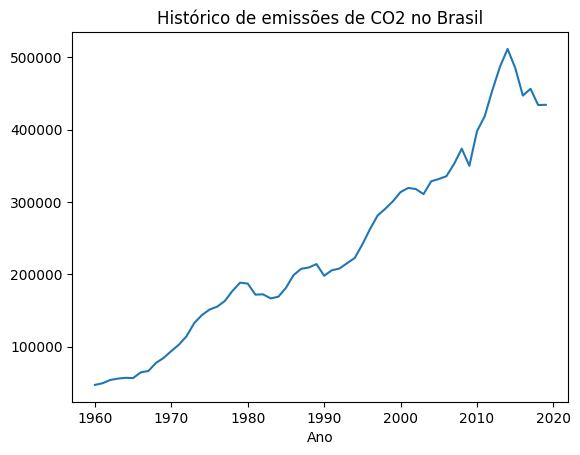

In [36]:
co2_br = df_co2[df_co2['country_name'] == 'Brazil']
co2_br.plot(x='year', y='value', legend=False,
            title='Histórico de emissões de CO2 no Brasil',
            xlabel='Ano')

**Exercício 3**. Uma visualização muito similar à anterior, mas com a adição da média global de emissão de CO2 (o Brasil deve ser incluído na linha da média global?).

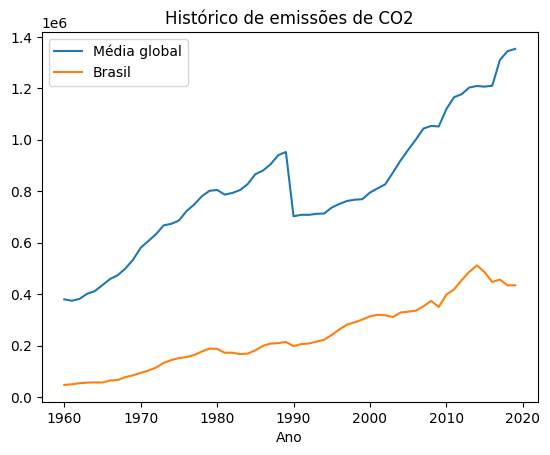

In [49]:
import matplotlib.pyplot as plt

co2_global = df_co2.groupby('year')['value'].mean()

fig, ax = plt.subplots(1,1)
co2_global.plot(ax=ax)
co2_br.plot(x='year', y='value', ax=ax)
plt.title('Histórico de emissões de CO2')
plt.xlabel('Ano')
plt.legend(['Média global', 'Brasil'])

**Exercício 4.** Os 10 países que mais aumentaram, percentualmente, a emissão de CO2 entre os anos de 2018 e 2019, na forma de um gráfico de barras horizontal.

In [123]:
co2_2018_2019 = df_co2[df_co2['year'].isin([2018, 2019])]
pct_change = co2_2018_2019.groupby(['country_name', 'year'])['value']\
                            .sum()\
                            .unstack()\
                            .pct_change(axis=1)[2019] * 100
grafico_pctchange = round(pct_change.sort_values(ascending=False)[:10], 2)
grafico_pctchange


country_name
Panama             32.60
Kenya              27.39
Madagascar         22.99
Suriname           19.91
Vietnam            17.82
El Salvador        14.54
Yemen, Rep.        14.20
North Macedonia    13.70
Congo, Rep.        11.86
Myanmar            11.48
Name: 2019, dtype: float64

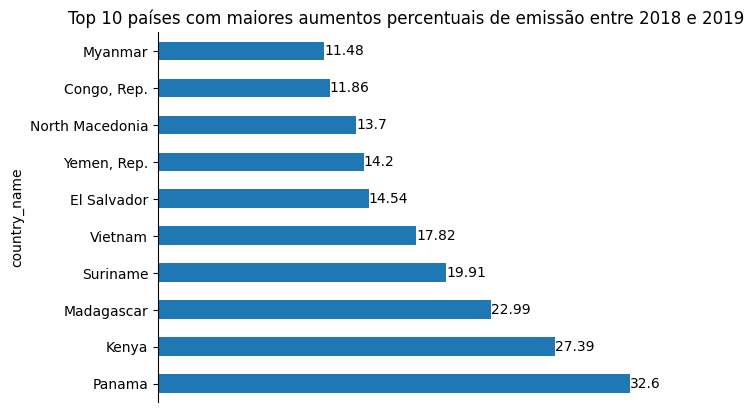

In [124]:
ax = grafico_pctchange.plot(kind='barh',
                            title='Top 10 países com maiores aumentos percentuais de emissão entre 2018 e 2019')
ax.bar_label(ax.containers[0])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.get_xaxis().set_visible(False)
plt.show()
